In [129]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import cv2

#load images into numoy arrays
def load_image(filepath):
    img = Image.open(filepath)
    return np.asarray(img).astype(float)/255

#takes an input of images to outout a noise threshold for the specific images.
def determine_noise(images):
    mean_img = np.mean(images, axis=0)
    N = images.shape[0]
    
    differences = []
    for i in range(N):
        matrix = images[i]
        for j in range(N):
            if i != j:
                diff = np.abs(matrix - images[j])
                differences.append(diff)

    differences = np.array(differences)

    noise_range = calculate_range(mean_img, differences)
    return noise_range

def calculate_range(mean_matrix, differences):
    max_diff = np.max(differences)
    average_of_meanMatrix = np.mean(max_diff)

    min = average_of_meanMatrix - max_diff
    max = average_of_meanMatrix + max_diff

    noise_range = np.array([min, max])
    return noise_range

In [130]:
# Define a list of file paths
sensor2_withoutContact_files = [
    "sensor-2-imgs/sensor2_without_1.png",
    "sensor-2-imgs/sensor2_without_2.png",
    "sensor-2-imgs/sensor2_without_3.png",
    "sensor-2-imgs/sensor2_without_4.png",
    "sensor-2-imgs/sensor2_without_5.png"
]

# Load the images using a list
sensor2_withoutContact_imgs = np.array([np.sum(load_image(file), axis=2) for file in sensor2_withoutContact_files])

# Load the image with contact
sensor2_withContact_img1 = np.sum(load_image("sensor-2-imgs/Sensor2_with.png"), axis=2)

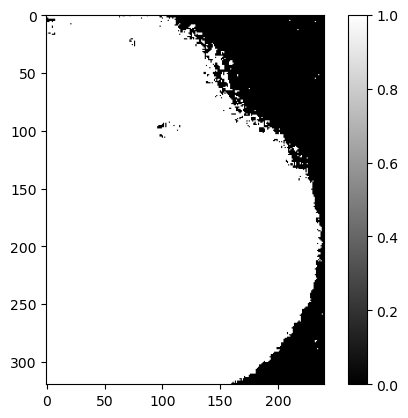

In [131]:
# Define the threshold
noise = determine_noise(sensor2_withoutContact_imgs)
contactImg = sensor2_withContact_img1
ChangeImg = contactImg - np.mean(sensor2_withoutContact_imgs, axis=0)

for row in range(ChangeImg.shape[0]):
    for col in range(ChangeImg.shape[1]):
        pixel = 0

        if ChangeImg[row, col] < threshold[0] or ChangeImg[row, col] > threshold[1]:
            pixel = 1

        ChangeImg[row, col] = pixel

# Display the array as an image
plt.imshow(ChangeImg, cmap='gray')  # 'gray' colormap for grayscale image
plt.colorbar()  # Add a colorbar to show the scale
plt.show()

NOT COMBINING THE R,G,B PIXELS:

In [132]:
# Define a list of file paths
sensor2_withoutContact_files = [
    "sensor-2-imgs/sensor2_without_1.png",
    "sensor-2-imgs/sensor2_without_2.png",
    "sensor-2-imgs/sensor2_without_3.png",
    "sensor-2-imgs/sensor2_without_4.png",
    "sensor-2-imgs/sensor2_without_5.png"
]

# Load the images using a list
sensor2_withoutContact_imgs = np.array([load_image(file) for file in sensor2_withoutContact_files])

# Load the image with contact
sensor2_withContact_img1 = load_image("sensor-2-imgs/Sensor2_with.png")

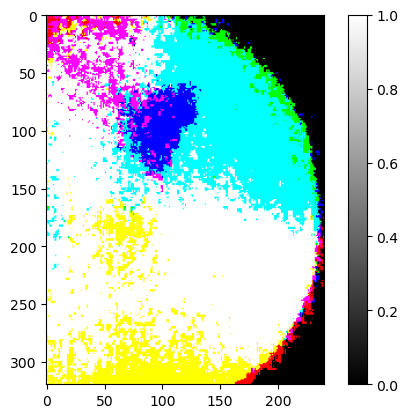

In [133]:
# Define the threshold
noise = determine_noise(sensor2_withoutContact_imgs)
contactImg = sensor2_withContact_img1
ChangeImg = contactImg - np.mean(sensor2_withoutContact_imgs, axis=0)

for row in range(ChangeImg.shape[0]):
    for col in range(ChangeImg.shape[1]):
        # Access RGB values of the current pixel
        r, g, b = 0, 0, 0
        
        if ChangeImg[row, col][0] < threshold[0] or ChangeImg[row, col][0] > threshold[1]:
            r = 1

        if ChangeImg[row, col][1] < threshold[0] or ChangeImg[row, col][1] > threshold[1]:
            g = 1

        if ChangeImg[row, col][2] < threshold[0] or ChangeImg[row, col][2] > threshold[1]:
            b = 1

        ChangeImg[row, col] = r, g, b 

# Display the array as an image
plt.imshow(ChangeImg, cmap = 'gray')  # 'gray' colormap for grayscale image
plt.colorbar()  # Add a colorbar to show the scale
plt.show()

THE FOLLOWING IS DOING THE SAME AS ABOVE BUT WITH A NO CONTACT IMAGE

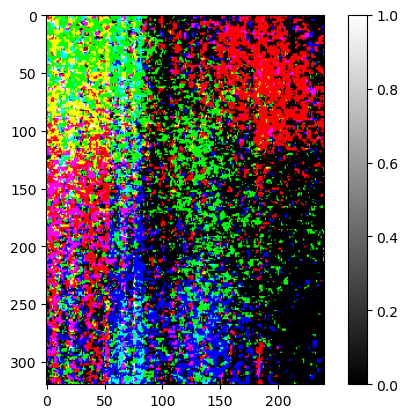

In [138]:
noise = determine_noise(sensor2_withoutContact_imgs)
contactImg = sensor2_withContact_img1
ChangeImg = sensor2_withoutContact_imgs[0] - np.mean(sensor2_withoutContact_imgs, axis=0)

for row in range(ChangeImg.shape[0]):
    for col in range(ChangeImg.shape[1]):
        # Access RGB values of the current pixel
        r, g, b = 0, 0, 0
        
        if ChangeImg[row, col][0] < threshold[0] or ChangeImg[row, col][0] > threshold[1]:
            r = 1

        if ChangeImg[row, col][1] < threshold[0] or ChangeImg[row, col][1] > threshold[1]:
            g = 1

        if ChangeImg[row, col][2] < threshold[0] or ChangeImg[row, col][2] > threshold[1]:
            b = 1

        ChangeImg[row, col] = r, g, b 

# Display the array as an image
plt.imshow(ChangeImg, cmap = 'gray')  # 'gray' colormap for grayscale image
plt.colorbar()  # Add a colorbar to show the scale
plt.show()